## Visualizing Earnings Based on College Degrees

In this project, we'll be looking at a dataset which contains information on the job outcomes of recent graduates. To explore the data, we'll first clean it up a little and then examine it using various plots.

In [1]:
import pandas as pd

In [2]:
import sys
!{sys.executable} -m pip install matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
recent_grads = pd.read_csv("recent-grads.csv")

Let's take a look at the data.

In [6]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

First things first, let's alter the column headings to be snakecase.

In [7]:
recent_grads.columns = [c.lower() for c in recent_grads.columns]
recent_grads = recent_grads.rename(columns = {"sharewomen": "share_women"})

In [8]:
recent_grads.columns

Index(['rank', 'major_code', 'major', 'total', 'men', 'women',
       'major_category', 'share_women', 'sample_size', 'employed', 'full_time',
       'part_time', 'full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th', 'college_jobs', 'non_college_jobs',
       'low_wage_jobs'],
      dtype='object')

Now let's plot some graphs to get an idea of some relationships. Let's look at: 1) the relationship between the popularity of a major and the median salary of its graduates; 2) the relationship between the popularity of a major and subsequent unemployment rate; 3) the relationship between the number of women that take a major and that median salary. Bear in mind that the "median" value is based on the salaries of those in full-time, year-round employment.

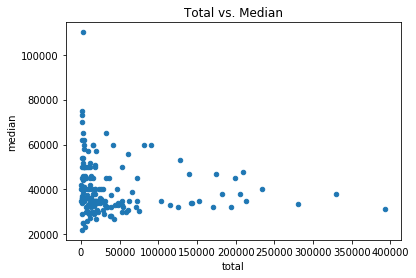

In [10]:
total_vs_median = recent_grads.plot(x = "total", y = "median", kind = "Scatter", title = "Total vs. Median")

It doesn't look as if there's much of a correlation between the number of students that major in a subject and the median salary of the graduates with that major. There may be a slight positive correlation as, for totals over around 10,000, there are not low results, but there is not much data to strongly confirm this.

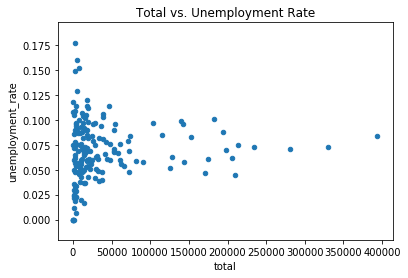

In [11]:
total_vs_unemployment_rate = recent_grads.plot(x = "total", y = "unemployment_rate", kind = "Scatter", title = "Total vs. Unemployment Rate")

From what's visible on the graph, there seems to be almost no correlation here. There are no majors with over 10,000 students with an unemployment rate much below 0.05, but again that could just be the sample size, especially given that there are many majors which are unpopular but which have a high unemployment rate.

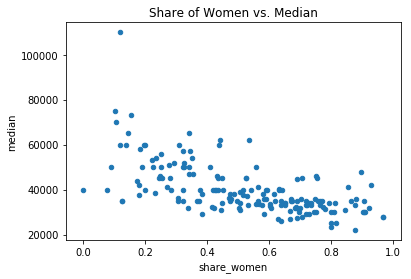

In [13]:
share_women_vs_median = recent_grads.plot(x = "share_women", y = "median", kind = "Scatter", title = "Share of Women vs. Median")

This relationship is a little more interesting than the above two as the data actually seems to indicate a negative correlation between median salary (of those in full-time year-round employment) and the share of women that take the course.

Let's explore the data further, but this time using histograms.

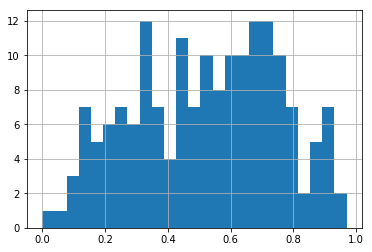

In [16]:
recent_grads["share_women"].hist(bins = 25)

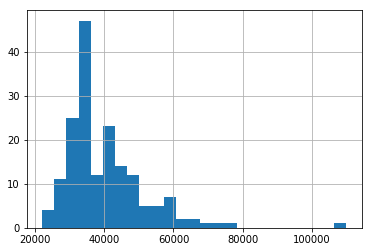

In [18]:
recent_grads["median"].hist(bins = 25)

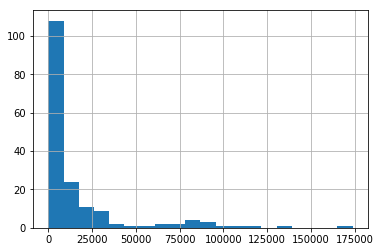

In [25]:
recent_grads["men"].hist(bins = 20)

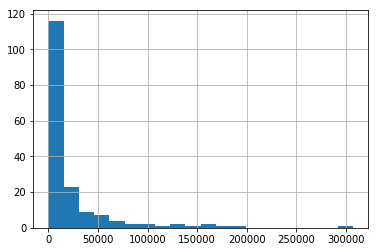

In [24]:
recent_grads["women"].hist(bins = 20)

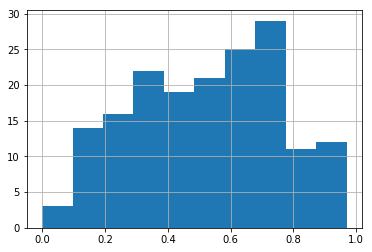

In [26]:
recent_grads["share_women"].hist(bins = 10)

From the above we can see that the median salary is relatively evenly distributed, with the modal median salary range at a little over \$30,000, that the vast majority of majors have a small number of men and of women, and that most majors contain more women than men.

To make the multiple graphs we have easier to compare, let's create a scatter matrix with both the histograms and scatter plots on it.

In [27]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A90A050>,
      dtype=object)

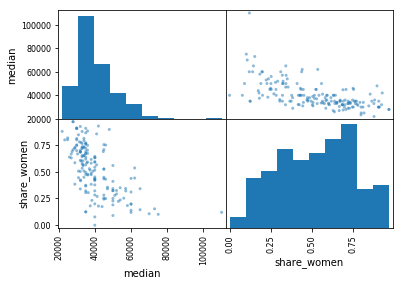

In [31]:
scatter_matrix(recent_grads[["median", "share_women"]])

While I have to say this scatter matrix is not exactly a treat for the eyes, it does highlight quite clearly the (albeit minor) negative correlation between median salary and the proportion of women that take a particular major. As the proportion of women taking a major increases, the median salary of the people that took that major decreases.

Let's do a couple more scatter matrices with the variables unemployment rate and full-time year-round involved to see what we find.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A958D70>,
      dtype=object)

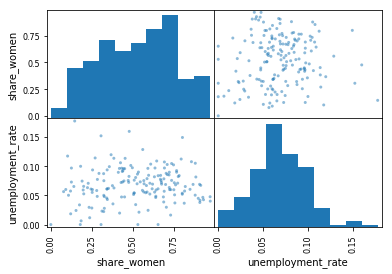

In [33]:
scatter_matrix(recent_grads[["share_women", "unemployment_rate"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CE8FC30>,
      dtype=object)

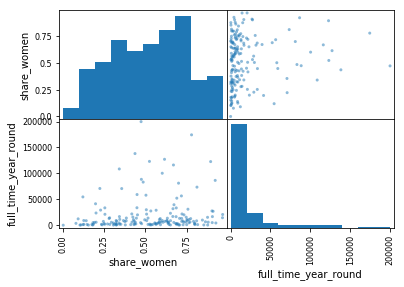

In [34]:
scatter_matrix(recent_grads[["share_women", "full_time_year_round"]])

Nothing too interesting on either of these graphs as far as correlations go. Unemployment rate does not appear to be at all correlated, either positively or negatively, with the proportion of women taking the course. Similarly, the number of graduates in full time employment is not correlated with the number of women taking the course.